# 2. Exploratory Data Analysis

In order to address the business challenges faced by our client, an in-depth Exploratory Data Analysis (EDA) will be conducted on the dataset containing information on used cars. The goal of this analysis is to extract valuable insights that will inform the development of a predictive model for estimating the purchase price range of pre-owned vehicles.

In [2]:
#Load preprocessed data
## EDA Standard Libary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data
combined_final = pd.read_csv('Combined Dataset.csv')
combined_final.head()

,Unnamed: 0,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg,brand
0,0,C Class,2020,30495,Automatic,1200,Diesel,2.0,145.0,61.4,Mercedes
1,1,C Class,2020,29989,Automatic,1000,Petrol,1.5,145.0,46.3,Mercedes
2,2,C Class,2020,37899,Automatic,500,Diesel,2.0,145.0,61.4,Mercedes
3,3,C Class,2019,30399,Automatic,5000,Diesel,2.0,145.0,61.4,Mercedes
4,5,C Class,2019,29899,Automatic,4500,Diesel,2.0,145.0,61.4,Mercedes


### **2.1. Average Price by Manufacturer Brand**

Price Dynamics across Manufacturing Brands: Analyzing the variation in purchase prices across different manufacturers

In [4]:
price_mean = combined_final.groupby('brand')['price'].median().sort_values(ascending = False)
price_mean

brand
Mercedes      22490.0
Audi          20000.0
Volkswagen    15491.5
Skoda         12998.0
Ford          11500.0
Toyota        10798.0
Name: price, dtype: float64

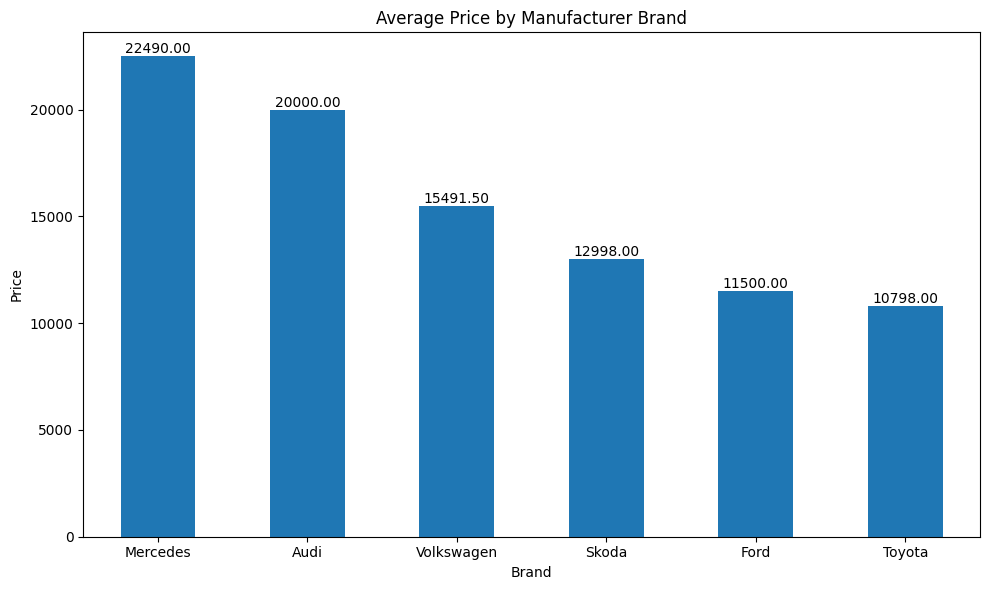

In [5]:
plt.figure(figsize=(10, 6))

# Generate a colormap with a unique color for each brand
# colors = plt.cm.tab10(np.arange(len(price_mean)))

# Create a bar plot with the specified colors
bars = price_mean.plot(kind='bar')

# Add labels on top of the bars
for bar, label in zip(bars.patches, price_mean.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

plt.gca().set_xticklabels(price_mean.index, rotation=0, ha='center')

plt.title('Average Price by Manufacturer Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

- Mercedes cars seem to command a relatively higher average resale price compared to other brands in the list.
-  This suggests that Mercedes vehicles, on average, retain their value well in the used car market.
- Potential buyers should be prepared for a higher upfront cost when considering a used Mercedes, but they may benefit from a higher resale value down the line.
- The resale value trends also highlight the significance of brand perception and reputation in the used car market, influencing pricing dynamics.

### **2.2. Average Car Sale Price by Manufacturing Year**

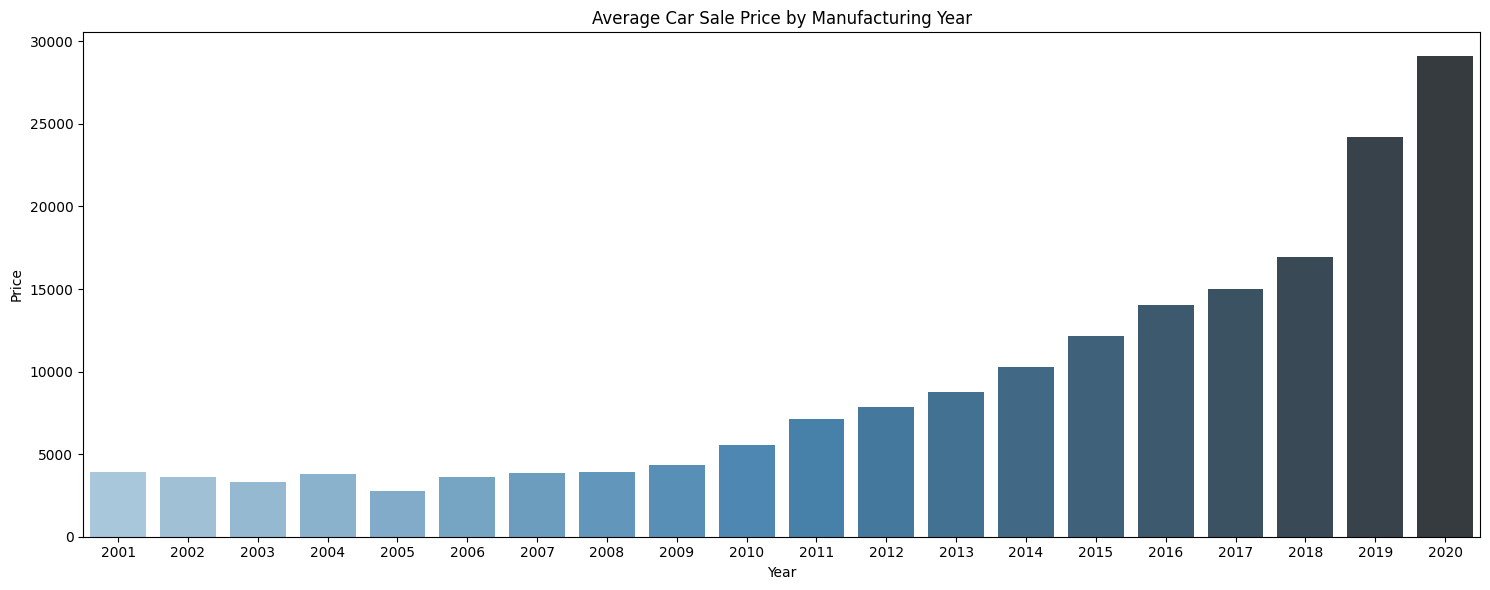

In [6]:
year_mean = combined_final.groupby('year')['price'].median().sort_values()

#Plot yearly mean price 
plt.figure(figsize = (15,6))
sns.barplot(x='year', y='price', data=combined_final, errorbar=None, orient='v', palette='Blues_d')
plt.title('Average Car Sale Price by Manufacturing Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

The chart provides a visual representation of the average sales prices of cars by their manufacturing year.

**Increasing Trend in Sales Prices Over Time:**
- The data exhibits a generally increasing trend in sales prices as the manufacturing year becomes more recent. 
- Newer cars tend to have higher average sales prices, reflecting the common expectation that the value of a car decreases over time.

**There is a notable leap in sales prices for cars manufactured in the years 2018, 2019, and 2020.**
- This observation suggests that cars from these recent years are in high demand, possibly due to factors such as advanced features, improved safety standards, and enhanced performance. 
- The market's willingness to pay a premium for these newer models is reflected in the higher sales prices.

### **2.3. Top 5 Models by Sales Price**

model
 R8            111490.0
G Class         99850.0
 California     57991.0
 Q8             56996.0
 RS4            54950.0
Name: price, dtype: float64

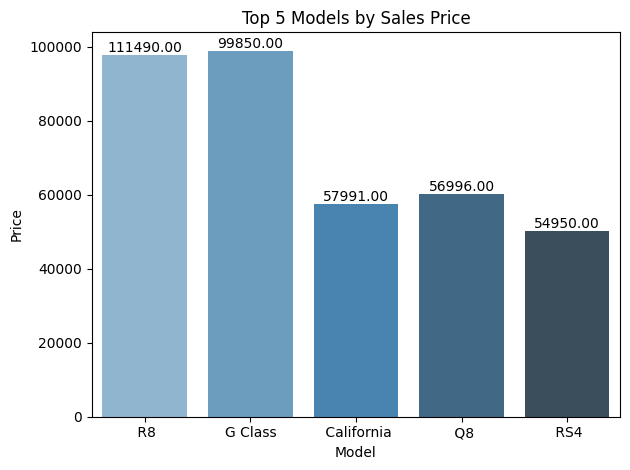

In [7]:
#FInd top 5 models with highest mean price
top_models = combined_final.groupby('model')['price'].median().sort_values(ascending = False).head(5)
display(top_models)

#Plot top 5 models with highest mean price
bars = sns.barplot(x='model', y='price', data=combined_final, order=top_models.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, top_models.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

plt.title('Top 5 Models by Sales Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

- Higher-end models, such as the R8 and G Class, exhibit substantially higher price points, emphasizing the diverse pricing spectrum within the used cars lineup.
- The dataset showcases model-specific price points, with the Audi R8 commanding a premium price of £111,490. Other notable models like the G Class and California also have relatively high average prices, reflecting their luxury and performance attributes in the market.

### **2.4. Top 5 Models by Listing Counts**

model
Focus      7057
Fiesta     6487
C Class    6248
 Golf      4793
 Polo      3244
Name: count, dtype: int64

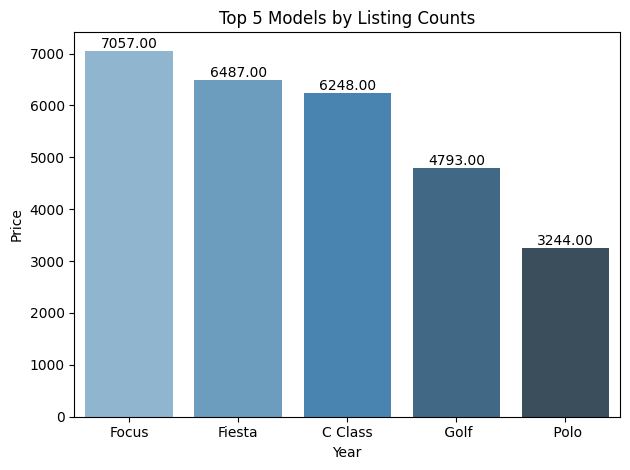

In [8]:
#Count top 5 models count

model_counts = combined_final['model'].value_counts().sort_values(ascending = False).head(5)
display(model_counts)

#Plot top 5 models with highest count
bars = sns.barplot(x=model_counts.index, y=model_counts.values, data=combined_final, order=model_counts.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, model_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')
    
plt.title('Top 5 Models by Listing Counts')
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

The data reveals that the Ford Focus is the most prevalent model, with a significant count of 7,057 cars. This suggests a strong presence and popularity of the Focus model in used cars listing.

### **2.5. Car Features Correlations**

<function matplotlib.pyplot.show(close=None, block=None)>

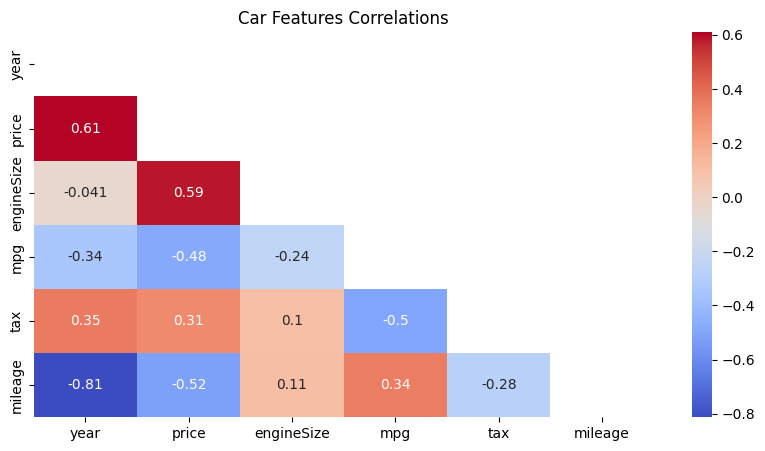

In [9]:
#Plot feature correlations 

plt.figure(figsize = (10,5))
data_corr = combined_final[['year', 'price', 'engineSize', 'mpg', 'tax', 'mileage']].corr('spearman')
matrix = np.triu(data_corr)
sns.heatmap(
    data_corr,
    annot = True,
    cmap = 'coolwarm',
    mask = matrix
)

plt.title('Car Features Correlations')

plt.show

- The correlation matrix provides a visual representation of the correlation coefficients between the different features in the dataset.
- Strong correlation on price and mileage: The price of a car is strongly correlated with its mileage, which is expected as the value of a car decreases with its usage.
- Strong correlation on price and mileage: The price of a car is strongly correlated with its mileage, which is expected as the value of a car decreases with its usage.
- Strong correlation on yearand mileage: The year of manufacture is also strongly correlated with the mileage, which is expected as newer cars tend to have lower mileage.

### 2.6 Price Distribution by Brands

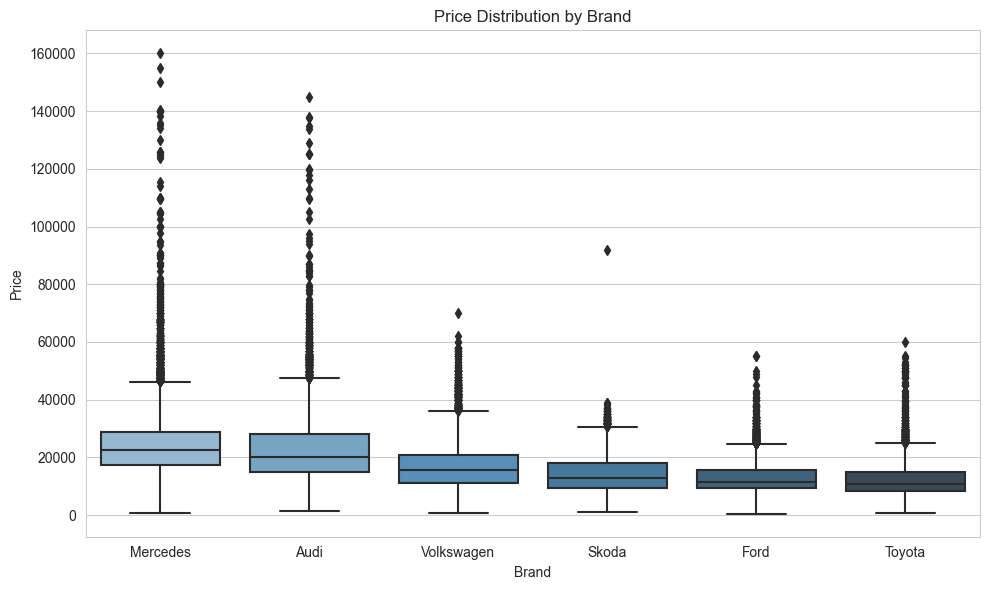

In [40]:
#PLot boxplot for price by brands
plt.figure(figsize=(10, 6))
sns.boxplot(x='brand', y='price', data=combined_final, order=price_mean.index)
plt.title('Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### 2.7 Transmission Types

transmission
Semi-Auto    23900.053638
Automatic    22218.157659
Manual       12664.802005
Name: price, dtype: float64

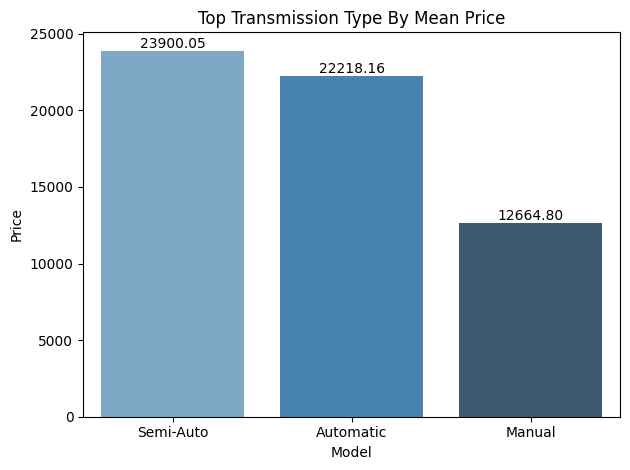

In [11]:
top_model = combined_final.groupby('transmission')['price'].mean().sort_values(ascending = False).head(5)
display(top_model)

#Plot top 5 models with highest mean price
bars = sns.barplot(x='transmission', y='price', data=combined_final, order=top_model.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, top_model.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.2f}', ha='center', va='bottom')

plt.title('Top Transmission Type By Mean Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

### 2.8 Brand Car listing counts by Year

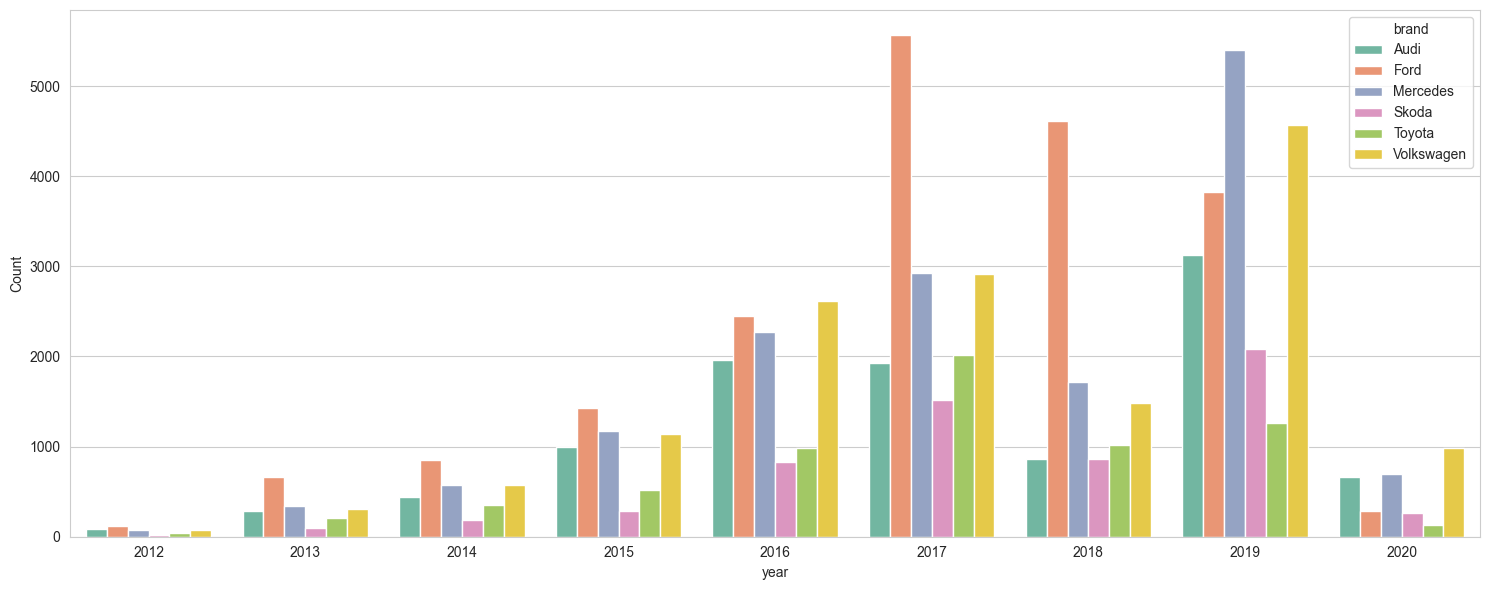

In [56]:

# Count of totals of each brand and year
brand_year_counts = combined_final[combined_final['year'] > 2011].groupby(['brand', 'year']).size().reset_index(name='count')

# Plot yearly mean price and count of each brand-year combination
fig, ax1 = plt.subplots(figsize=(15, 6))

# Create a second y-axis for the count of each brand-year combination
sns.barplot(x='year', y='count', hue='brand', data=brand_year_counts, palette='Set2', dodge=True)
ax1.set_ylabel('Count')  # Fix the line here

plt.tight_layout()
plt.show()


- The number of cars listed by year is increasing yearly and peaked in 2017-2019 models with Ford dominating the market.
- The demand for Mercedes cars is increasing yearly with slight drop in 2018 and peaked in 2009 models.

### Average Mileage of Used Car by Brands

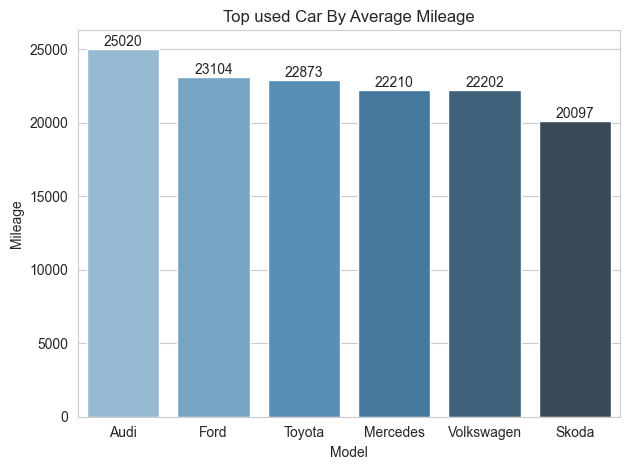

In [57]:
average_milleage = combined_final.groupby('brand')['mileage'].mean().sort_values(ascending= False)
average_milleage

bars = sns.barplot(x='brand', y='mileage', data=combined_final, order=average_milleage.index, errorbar=None, orient='v', palette='Blues_d')

#Add bar label for each model
for bar, label in zip(bars.patches, average_milleage.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{label:.0f}', ha='center', va='bottom')

plt.title('Top used Car By Average Mileage')
plt.xlabel('Model')
plt.ylabel('Mileage')
plt.tight_layout()
plt.show()

Audi and Ford have median mileages around 25,020 and 23,103 miles, respectively, indicating moderate usage levels.

Skoda stands out with the lowest median mileage of approximately 20,097 miles, suggesting potentially newer or less frequently driven vehicles compared to other brands.

### Mileage vs Price

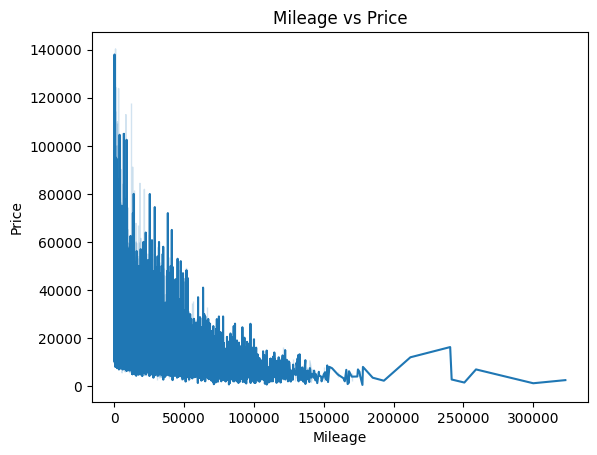

In [15]:
sns.lineplot(x='mileage', y='price', data=combined_final)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

The price vs mileage plot shows a negative correlation between the two variables, indicating that the price of a used car tends to decrease as the mileage increases.

### MPG vs Price

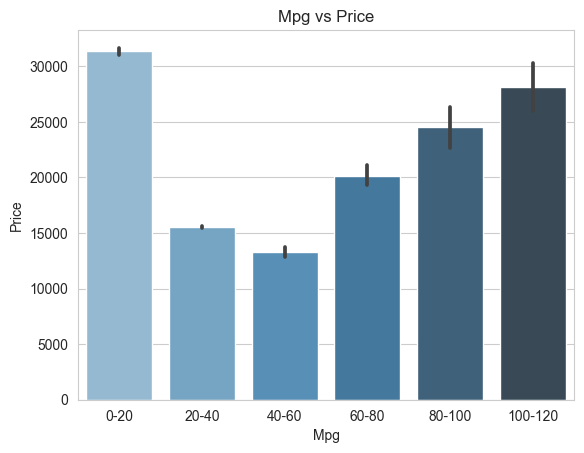

In [32]:
#Bin mpg into 5 groups, and plot vs median price
combined_final['mpg_bin'] = pd.cut(combined_final['mpg'], bins=6, labels=False)
sns.set_palette('Blues_d')
sns.set_style('whitegrid')
sns.barplot(x='mpg_bin', y='price', data=combined_final)
#Set color 

plt.title('Mpg vs Price')
plt.xlabel('Mpg')
plt.ylabel('Price')
#Add labels to x axis
plt.xticks(np.arange(6), ('0-20', '20-40', '40-60', '60-80', '80-100', '100-120'))

plt.show()


- Lower mpg cars tend to have higher prices, suggesting that fuel efficiency is a key factor in determining the price of a used car.
- The data also shows that the price of a used car tends to increase as the mpg increases, indicating that fuel efficiency is a key factor in determining the price of a used car.
- But the 0-20 mpg cars have higher prices than 20-40 mpg cars, suggesting that certain type of cars, such as SUVs, may have higher prices despite lower fuel efficiency.

### Transmission Type and Price

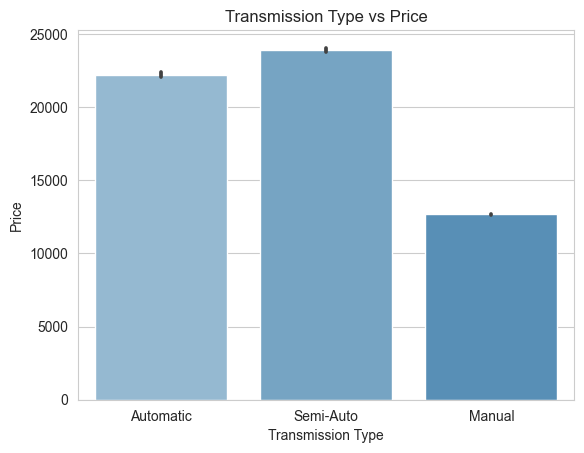

In [34]:
#Transmission types
combined_final['transmission'].value_counts()

#Plot transmission type comparison
sns.set_palette('Blues_d')
sns.set_style('whitegrid')
sns.barplot(x='transmission', y='price', data=combined_final)
plt.title('Transmission Type vs Price')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

- Semi-Auto cars have the highest median price, followed by Automatic and Manual cars.

### Fueltype vs Price vs Year

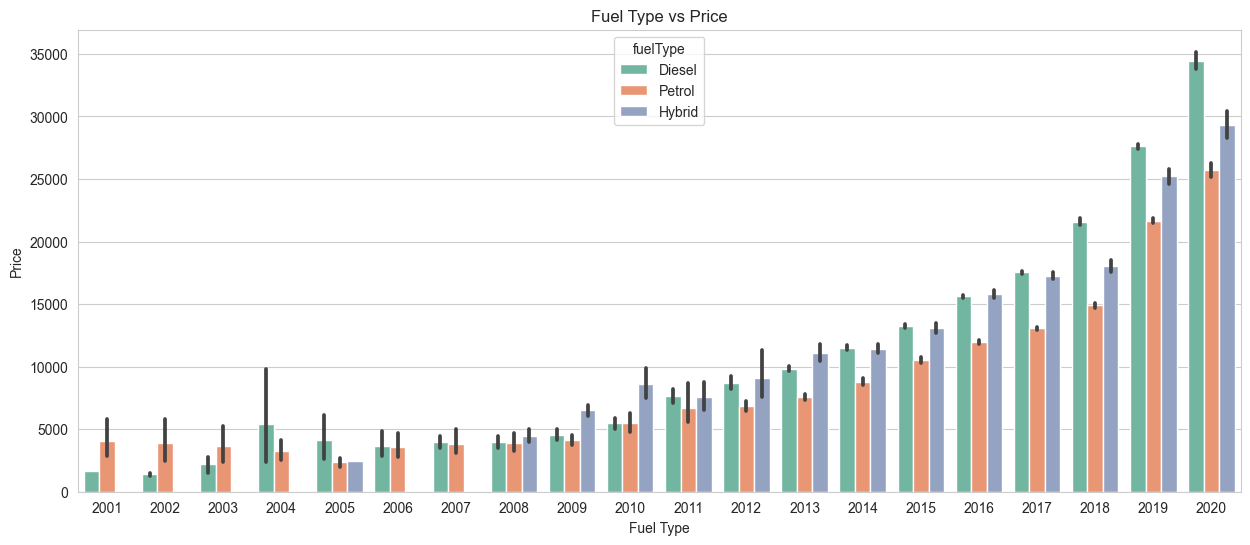

In [75]:
#PLot fueltype, year and price comparison

sns.set_style('whitegrid')
plt.figure(figsize=(15, 6))


sns.set_palette('Set2')
sns.barplot(x='year', y='price', data=combined_final, hue='fuelType')
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

#Set contrasting palette
plt.show()


- The petrol tends to have stable prices over the years of 2001-2009
- The Dieasel tends to have higher increase in prices over the years of 20110-2019
- The hybrid tends to have increasing prices and beating petrol prices over the years of 2008-2020

---

